In [1]:
import fix_jupyter
import networkx as nx
from path_reference.folder_reference import get_data_path
from pathlib import Path
from nlp.relationship_creator import RelationshipCreator
from matplotlib import pyplot as plt
from nlp.relationship_creator import get_network_df
import pandas as pd

In [ ]:
network_df = get_network_df()
network_df = network_df.rename(columns={'occurrences': 'value'})

In [ ]:
network_df

In [ ]:
G = nx.from_pandas_edgelist(network_df, source="source", target="target", edge_attr="value", create_using=nx.Graph())

In [6]:
G

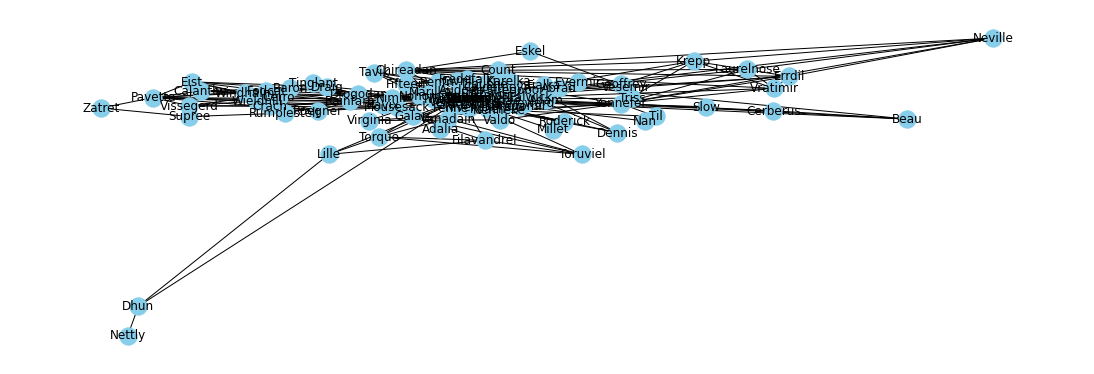

In [7]:
fig = plt.figure(figsize=(15, 5))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

In [8]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

In [9]:
G["Geralt"]

AtlasView({'Velerad': {'weight': 55, 'label': 55}, 'Foltest': {'weight': 45, 'label': 45}, 'Adda': {'weight': 52, 'label': 52}, 'Ostrit': {'weight': 198, 'label': 198}, 'Nenneke': {'weight': 12242, 'label': 12242}, 'Iola': {'weight': 128, 'label': 128}, 'Roach': {'weight': 651, 'label': 651}, 'Two': {'weight': 3225, 'label': 3225}, 'Rulle': {'weight': 72, 'label': 72}, 'Nivellen': {'weight': 2239, 'label': 2239}, 'Glutton': {'weight': 197, 'label': 197}, 'Fenne': {'weight': 322, 'label': 322}, 'Primula': {'weight': 573, 'label': 573}, 'Venimira': {'weight': 118, 'label': 118}, 'Vereena': {'weight': 128, 'label': 128}, 'Falwick': {'weight': 12265, 'label': 12265}, 'Hereward': {'weight': 315, 'label': 315}, 'Ermellia': {'weight': 174, 'label': 174}, 'Trigla': {'weight': 181, 'label': 181}, 'Caldemeyn': {'weight': 3599, 'label': 3599}, 'Stregobor': {'weight': 4442, 'label': 4442}, 'Zavist': {'weight': 211, 'label': 211}, 'Eltibald': {'weight': 214, 'label': 214}, 'Fredefalk': {'weight': 6